In [39]:
import pandas as pd

In [40]:
d1=pd.read_csv('Employee_data.csv')

In [41]:
d=d1.copy()

In [42]:
print(d.head())
print(d.shape)

   Unnamed: 0  id groups  age  healthy_eating  active_lifestyle  salary
0           0   0      A   36               5                 5    2297
1           1   1      A   55               3                 5    1134
2           2   2      A   61               8                 1    4969
3           3   3      O   29               3                 6     902
4           4   4      O   34               6                 2    3574
(1000, 7)


In [43]:
print(d.describe)


<bound method NDFrame.describe of      Unnamed: 0   id groups  age  healthy_eating  active_lifestyle  salary
0             0    0      A   36               5                 5    2297
1             1    1      A   55               3                 5    1134
2             2    2      A   61               8                 1    4969
3             3    3      O   29               3                 6     902
4             4    4      O   34               6                 2    3574
..          ...  ...    ...  ...             ...               ...     ...
995         995  995      O   33               7                 7    2996
996         996  996      O   21               1                 2     667
997         997  997      O   49               9                 7    4158
998         998  998     AB   56               6                 7    2414
999         999  999      B   64               4                 9     788

[1000 rows x 7 columns]>


In [44]:
type(d)

pandas.core.frame.DataFrame

In [45]:
d1=pd.DataFrame(d)

In [46]:
type(d1) # so read_csv directly fetch data and convert it into dataframe

pandas.core.frame.DataFrame

In [47]:
d.head()

,Unnamed: 0,id,groups,age,healthy_eating,active_lifestyle,salary
0,0,0,A,36,5,5,2297
1,1,1,A,55,3,5,1134
2,2,2,A,61,8,1,4969
3,3,3,O,29,3,6,902
4,4,4,O,34,6,2,3574


In [48]:
y=d['salary'].copy()

In [49]:
print(y.head())
print(type(y))

0    2297
1    1134
2    4969
3     902
4    3574
Name: salary, dtype: int64
<class 'pandas.core.series.Series'>


In [50]:
X=d.drop(['salary'], axis=1)

In [51]:
print(X.head())
print(X.shape)

   Unnamed: 0  id groups  age  healthy_eating  active_lifestyle
0           0   0      A   36               5                 5
1           1   1      A   55               3                 5
2           2   2      A   61               8                 1
3           3   3      O   29               3                 6
4           4   4      O   34               6                 2
(1000, 6)


In [52]:
X=X.drop(['Unnamed: 0'], axis=1) # or we can drop unknow column while reading dataset my making index=False

In [53]:
print(X.head())
print(X.shape)

   id groups  age  healthy_eating  active_lifestyle
0   0      A   36               5                 5
1   1      A   55               3                 5
2   2      A   61               8                 1
3   3      O   29               3                 6
4   4      O   34               6                 2
(1000, 5)


In [54]:
#here checking null
print("groups ",X['groups'].isnull().sum())
print("age ",X['age'].isnull().sum())
print("healthy_eating ",X['healthy_eating'].isnull().sum())
print("active_lifestyle ",X['active_lifestyle'].isnull().sum())

groups  0
age  0
healthy_eating  0
active_lifestyle  0


In [55]:
X=X.drop(['id'], axis=1)

In [56]:
print(X.head())
print(X.shape)

  groups  age  healthy_eating  active_lifestyle
0      A   36               5                 5
1      A   55               3                 5
2      A   61               8                 1
3      O   29               3                 6
4      O   34               6                 2
(1000, 4)


In [57]:
X.dtypes


# so group call is catogorical, we need to make it into numerical index using get_dummies() function,sothat we can train it

groups              object
age                  int64
healthy_eating       int64
active_lifestyle     int64
dtype: object

In [58]:
print(y.head())
print(y.shape)

0    2297
1    1134
2    4969
3     902
4    3574
Name: salary, dtype: int64
(1000,)


In [24]:
import matplotlib.pyplot as plt

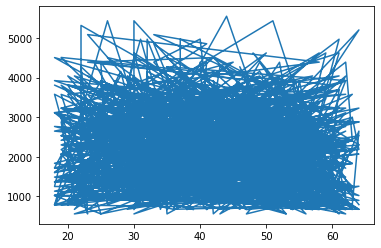

In [25]:
plt.plot(X['age'],y)

In [59]:
X.head()

,groups,age,healthy_eating,active_lifestyle
0,A,36,5,5
1,A,55,3,5
2,A,61,8,1
3,O,29,3,6
4,O,34,6,2


In [60]:
group=pd.get_dummies(X['groups'])

In [61]:
print(group.head())
print(group.shape)

   A  AB  B  O
0  1   0  0  0
1  1   0  0  0
2  1   0  0  0
3  0   0  0  1
4  0   0  0  1
(1000, 4)


In [62]:
X.shape

(1000, 4)

In [63]:
print("AB ",group['AB'].isnull().sum())
print("B ",group['B'].isnull().sum())
print("O ",group['O'].isnull().sum())

AB  0
B  0
O  0


In [64]:
X=X.drop(['groups'],axis=1)

In [65]:
print(X.head())
print(X.shape)

   age  healthy_eating  active_lifestyle
0   36               5                 5
1   55               3                 5
2   61               8                 1
3   29               3                 6
4   34               6                 2
(1000, 3)


In [66]:
X=pd.concat([X,group],axis=1)
print(X.head())
print(X.shape)

   age  healthy_eating  active_lifestyle  A  AB  B  O
0   36               5                 5  1   0  0  0
1   55               3                 5  1   0  0  0
2   61               8                 1  1   0  0  0
3   29               3                 6  0   0  0  1
4   34               6                 2  0   0  0  1
(1000, 7)


In [67]:
print(X.shape)
print(X.head())


(1000, 7)
   age  healthy_eating  active_lifestyle  A  AB  B  O
0   36               5                 5  1   0  0  0
1   55               3                 5  1   0  0  0
2   61               8                 1  1   0  0  0
3   29               3                 6  0   0  0  1
4   34               6                 2  0   0  0  1


In [68]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [69]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [70]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
regressor.intercept_

970.460782380308

In [71]:
X_test

,age,healthy_eating,active_lifestyle,A,AB,B,O
993,56,5,5,1,0,0,0
859,41,3,8,0,0,0,1
298,33,1,9,1,0,0,0
553,27,3,5,1,0,0,0
672,50,5,7,1,0,0,0
...,...,...,...,...,...,...,...
679,50,5,6,0,0,1,0
722,36,5,9,1,0,0,0
215,61,9,9,0,0,1,0
653,55,3,6,0,0,0,1


In [72]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [73]:
y_pred

array([2363.68938998,  893.20689664, -248.45093201, 1434.1221456 ,
       1995.58241986,  426.10099138, 1450.01191797, 2988.15157272,
       1817.60259821, 1321.18951203, 2452.31668309, 2253.57879823,
       1522.04557686, 3173.27688074, 1337.62413069, 2890.58173486,
       1615.31743611, 1297.350499  , 3277.1324505 , 2965.33409028,
       2801.59716743, 2651.38637633, 3850.02550296,  548.6319576 ,
       3240.88374979, 2485.00903523, 1832.42054763,  928.17170592,
       2933.00969925, 1424.11846468, 3364.11857786, 3088.4343993 ,
       3728.86487328, 3189.21970603,  964.87259442, 3213.90778675,
       2574.35087697, 1967.31090916, 4041.2244744 , 2283.08114744,
        554.56041518, 1071.1760315 ,  425.74371706, 1241.49407689,
       3615.42165765, 1683.33187184, 2481.07901772, 2963.54771869,
       2296.30029723, 1174.47294525,   46.19328195,   82.24060097,
       1594.20209858, 1155.01042969, 2432.63044283, 1312.93604997,
       2661.03278293, 4872.15005796, 2385.29555145, 2798.72828

In [74]:
y_test

993    2297
859     662
298    2056
553    1134
672    1833
       ... 
679    2065
722    1369
215    3694
653     902
150    2529
Name: salary, Length: 200, dtype: int64

In [75]:
from sklearn.metrics import r2_score
#through this we will calculate accuracy

In [76]:
score=r2_score(y_test,y_pred)
score   # model is performing well because we have got 0.9(above .8 is consider model is good)

0.8509563941287837

### Ridge 

In [77]:
from sklearn.linear_model import Ridge

In [78]:
re=Ridge()

In [80]:
re.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [117]:
re.intercept_

970.9870755295149

In [91]:
# Predicting the Test set results
y_pred1 = re.predict(X_test)

In [92]:
print(y_pred1)

[2363.65329561  893.59318907 -247.63924973 1434.44261428 1995.66247244
  426.65206146 1450.25099771 2987.47689665 1817.77604207 1321.47758822
 2452.29192114 2253.94772583 1522.25301177 3172.55036375 1338.00777271
 2889.96399957 1615.56321117 1297.23946476 3277.18731024 2965.11746209
 2800.96602221 2651.27058551 3849.90642717  548.68050413 3240.51678954
 2484.88031653 1832.50636999  928.17058608 2932.77889418 1424.38076285
 3363.37346023 3088.52032478 3728.78583323 3189.26738839  965.34537566
 3213.67802353 2574.23764573 1967.76784329 4041.08887549 2283.02683747
  555.4452017  1071.58914379  426.29270962 1241.82275861 3614.97594577
 1683.08835541 2480.92744632 2963.3207029  2296.32285542 1174.7421459
   46.91215203   82.4580802  1594.7460944  1155.34024411 2432.91221171
 1313.59713756 2660.9730851  4871.70860423 2385.21130842 2798.20073187
 3393.72056492 2489.5518904  2812.04294182 2737.39374818 2301.24425678
 1642.1521497  2175.81453818 2960.44588821 2764.70139037 2841.73433015
 1634.8

In [93]:
print(y_test)

993    2297
859     662
298    2056
553    1134
672    1833
       ... 
679    2065
722    1369
215    3694
653     902
150    2529
Name: salary, Length: 200, dtype: int64


In [94]:
ridge_score=r2_score(y_test,y_pred1)

In [95]:
ridge_score  

0.8509882790615015

In [88]:
from sklearn.linear_model import Lasso

In [112]:

las=Lasso()
las.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [120]:
print(las.intercept_)
print(las.fit_intercept)

976.6249074486577
True


In [97]:
# Predicting the Test set results
y_pred2 = las.predict(X_test)

In [98]:
lasso_score=r2_score(y_test,y_pred2)

In [99]:
lasso_score

0.8512090359830247